## Data Preparation

In [1]:
# Import necessary libraries and make necessary arrangements
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.filterwarnings('ignore')

In [2]:
# Import data
df_train=pd.read_csv("train.csv",index_col=0)
df_test =pd.read_csv("test.csv",index_col=0)
df_transactions = pd.read_csv("transactions.csv")
df_stores = pd.read_csv("stores.csv")
df_holidays = pd.read_csv("holidays_events.csv")
df_oil = pd.read_csv("oil.csv")

In [3]:
df_all = df_train.append(df_test)
df_all = df_all.loc[(df_all.store_nbr ==10) & (df_all["family"]=='GROCERY I')]
df_all = df_all.merge(df_stores,left_on="store_nbr",right_on="store_nbr",how="left")
df_holidays = df_holidays.rename(columns = {"type":"Holiday_type"})
df_all = df_all.merge(df_holidays,left_on="date",right_on="date",how="left")
df_all = df_all.merge(df_transactions,left_on=["date","store_nbr"],right_on=["date","store_nbr"],how="left")
df_all = df_all.merge(df_oil,left_on="date",right_on="date",how="left")
df_all = df_all.replace([","," "],"_",regex=True)
df_all = df_all.rename(columns = {"date":"Date"})
df_all["Date"] = df_all["Date"].astype("datetime64")

In [4]:
df_all["family"].unique()

array(['GROCERY_I'], dtype=object)

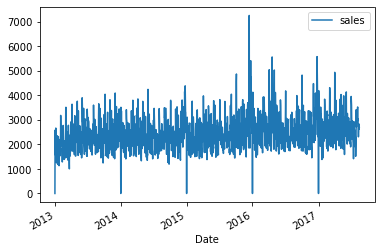

In [5]:
df_fft = df_all[["Date","sales"]][:-16]
df_fft = df_fft.set_index("Date")
df_fft.plot()
plt.show()

## Fourier Transformation

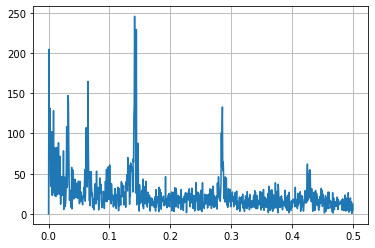

In [10]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = len(df_fft)
# sample spacing
T = 1
x = np.linspace(0.0, N*T, N, endpoint=False)
#y = df_diff.values-df_diff.mean()
y = df_fft["sales"].values-df_fft["sales"].mean()
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [13]:
fft_df = pd.DataFrame({"xf":xf,"yf":2.0/N *np.abs(yf[0:N//2]),"T":1/xf,"Phase":np.angle(yf[0:N//2])})
ft = fft_df.sort_values("yf",ascending=False)
ft.head(10)

,xf,yf,T,Phase
242,0.141190,245.671051,7.082645,2.439098
247,0.144107,229.125875,6.939271,1.274893
1,0.000583,204.543222,1714.000000,1.600747
243,0.141774,171.902049,7.053498,-1.003813
111,0.064761,164.631786,15.441441,0.020555
55,0.032089,147.053751,31.163636,1.277656
56,0.032672,138.305908,30.607143,-1.721009
241,0.140607,135.388940,7.112033,-2.666398
244,0.142357,133.208796,7.024590,0.338108
489,0.285298,132.923371,3.505112,-1.847089
